In [104]:
import glob
import pandas as pd
import tkinter as tk
from tkinter import filedialog
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
import os
import re

root = tk.Tk()
root.withdraw()
folder_path = filedialog.askdirectory()
# copy paste the pixel height of your image stack given in Fiji > Image > Properties > Voxel depth
voxel_size  = 1

In [105]:
def rename_coord_files(directory):
    # Iterate through all files in the specified directory
    for filename in os.listdir(directory):
        # Check if the filename matches the pattern 'Experiment-360-X_Results_Coord.csv' where X is 
        #a single digit
        match = re.match(r'^(Experiment-\d+)-(\d)_Results_Coord\.csv$', filename)
        if match:
            # Extract the base name and the single digit
            base_name = match.group(1)
            single_digit = match.group(2)
            
            # Create the new filename by padding the single digit with a leading zero
            new_filename = f"{base_name}-0{single_digit}_Results_Coord.csv"
            
            # Build the full file paths
            old_file_path = os.path.join(directory, filename)
            new_file_path = os.path.join(directory, new_filename)
            
            # Rename the file
            os.rename(old_file_path, new_file_path)
            print(f"Renamed: {filename} -> {new_filename}")

def rename_int_files(directory):
    # Iterate through all files in the specified directory
    for filename in os.listdir(directory):
        # Check if the filename matches the pattern 'Experiment-360-X_Results_Coord.csv' where X is a single digit
        match = re.match(r'^(Experiment-\d+)-(\d)_Results_int\.csv$', filename)
        if match:
            # Extract the base name and the single digit
            base_name = match.group(1)
            single_digit = match.group(2)
            
            # Create the new filename by padding the single digit with a leading zero
            new_filename = f"{base_name}-0{single_digit}_Results_int.csv"
            
            # Build the full file paths
            old_file_path = os.path.join(directory, filename)
            new_file_path = os.path.join(directory, new_filename)
            
            # Rename the file
            os.rename(old_file_path, new_file_path)
            print(f"Renamed: {filename} -> {new_filename}")
# Example usage

rename_coord_files(folder_path)
rename_int_files(folder_path)

In [106]:

# Use glob to get a list of all CSV files in the folder
# Use sort to make sure the files are in the correct order for coord and int files
coord_csv_files = np.sort(glob.glob(folder_path + '/*oord.csv'))
int_csv_files = np.sort(glob.glob(folder_path + '/*int.csv'))

print(coord_csv_files)
print(int_csv_files)

# Iterate over each CSV file and import it using pandas
coord_dataframes = []
int_dataframes = []

for file in coord_csv_files:
    df = pd.read_csv(file)
    coord_dataframes.append(df)

for file in int_csv_files:
    df = pd.read_csv(file)
    int_dataframes.append(df)
# Now you have two lists of dataframes, one representing the coordinates for the radius plots and the other representing the intensities
# each entry in the list is the CSV file from the folder


['/Users/millig/Documents/RNAfil_revisions/240926_GUVDeformationAnalysis_MI/control/Results_08/Snap-1000_7_Results_Coord.csv'
 '/Users/millig/Documents/RNAfil_revisions/240926_GUVDeformationAnalysis_MI/control/Results_08/Snap-1002_8_Results_Coord.csv'
 '/Users/millig/Documents/RNAfil_revisions/240926_GUVDeformationAnalysis_MI/control/Results_08/Snap-1003_9_Results_Coord.csv'
 '/Users/millig/Documents/RNAfil_revisions/240926_GUVDeformationAnalysis_MI/control/Results_08/Snap-1004_10_Results_Coord.csv'
 '/Users/millig/Documents/RNAfil_revisions/240926_GUVDeformationAnalysis_MI/control/Results_08/Snap-1004_11_Results_Coord.csv'
 '/Users/millig/Documents/RNAfil_revisions/240926_GUVDeformationAnalysis_MI/control/Results_08/Snap-658_12_Results_Coord.csv'
 '/Users/millig/Documents/RNAfil_revisions/240926_GUVDeformationAnalysis_MI/control/Results_08/Snap-660_13_Results_Coord.csv'
 '/Users/millig/Documents/RNAfil_revisions/240926_GUVDeformationAnalysis_MI/control/Results_08/Snap-661_14_Results_C

In [107]:
def get_characters_before_results(directory):
    # Create an empty list to store the extracted strings
    characters_list = []
    
    # Iterate through all files in the specified directory
    for file in coord_csv_files:
        # Extract the filename from the file path
        filename = os.path.basename(file)
        
        # Check if the filename matches the pattern 'Experiment-360-X_Results_Coord.csv' where X is a single digit
        match = re.match(r'^(.*?)_Results_', filename)
        if match:
            # Extract the characters before "_Results_"
            characters = match.group(1)
            
            # Append the characters to the list
            characters_list.append(characters)
    
    # Return the list of extracted strings
    return characters_list

# Example usage
characters_list = get_characters_before_results(folder_path)
print(characters_list)


['Snap-1000_7', 'Snap-1002_8', 'Snap-1003_9', 'Snap-1004_10', 'Snap-1004_11', 'Snap-658_12', 'Snap-660_13', 'Snap-661_14', 'Snap-664_15', 'Snap-695_16', 'Snap-697_17', 'Snap-767_1', 'Snap-771_2', 'Snap-772_3', 'Snap-777_4', 'Snap-778_5', 'Snap-849_18', 'Snap-850_19', 'Snap-850_20', 'Snap-999_6']


run the next window anyways

In [108]:
# calculate the angles for each coordinate and intensity from the given centroid cooridnates 
# and sort the dataframes by angle


for i in range(len(coord_dataframes)):
    # import the centroid coordinates from the first row of the coord dataframe for each image in the stack since the centroid might shift due to drift
    centroid_x = coord_dataframes[i]['Centroid_X'][0]
    centroid_y = coord_dataframes[i]['Centroid_Y'][0]
    print(i, centroid_x, centroid_y)

    # calculate angles for radial coordinates dataframe
    for j in range(len(coord_dataframes[i])):
        x = coord_dataframes[i]['X'][j]
        y = coord_dataframes[i]['Y'][j]
        
        if x == centroid_x:
            if y > centroid_y:
                coord_dataframes[i].at[j, 'angle'] = 0
            else:
                coord_dataframes[i].at[j, 'angle'] = np.pi
        else:
            if x > centroid_x:
                coord_dataframes[i].at[j, 'angle'] = np.arctan((y - centroid_y) / (x - centroid_x)) + np.pi/2
            else:
                coord_dataframes[i].at[j, 'angle'] = np.arctan((y - centroid_y) / (x - centroid_x)) + np.pi*3/2

    # calculate angles for intensity dataframe
    for k in range(len(int_dataframes[i])):
        x_rec = int_dataframes[i]['X'][k]
        y_rec = int_dataframes[i]['Y'][k]

        
        if x_rec == centroid_x:
            if y_rec > centroid_y:
                int_dataframes[i].at[k, 'angle'] = 0
                
            else:
                int_dataframes[i].at[k, 'angle'] = np.pi
        else:
            if x_rec > centroid_x:
                int_dataframes[i].at[k, 'angle'] = np.arctan((y_rec - centroid_y) / (x_rec - centroid_x)) + np.pi/2
            else:
                int_dataframes[i].at[k, 'angle'] = np.arctan((y_rec - centroid_y) / (x_rec - centroid_x)) + np.pi*3/2


    coord_dataframes[i] = coord_dataframes[i].sort_values('angle')
    int_dataframes[i] = int_dataframes[i].sort_values('angle')


0 24.401 26.891
1 37.169 37.176
2 41.912 31.266
3 30.324 31.603
4 55.889 27.485
5 24.218 43.432
6 17.272 38.925
7 34.238 19.169
8 38.004 30.964
9 33.648 31.035
10 35.158 31.96
11 35.85 24.706
12 38.142 41.371
13 34.717 39.937
14 18.536 19.838
15 39.426 21.394
16 35.142 32.954
17 19.957 35.312
18 38.011 32.678
19 34.253 57.563


Run the next window in case you want to plot the radii of a stack of images

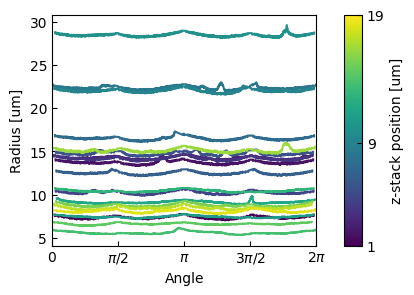

In [109]:
# plot data per stack in a radial plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(4, 3), 
                               gridspec_kw={'width_ratios': [15, 1]})
# set up color map
weights = np.arange(1, len(coord_dataframes)*voxel_size, voxel_size)
norm = cm.colors.Normalize(vmax=weights.max(), vmin=weights.min())
cmap = cm.viridis
color_list=[]


for i in range(len(coord_dataframes)):
    color_list.append(cmap(i/(len(coord_dataframes))))
    ax1.plot(coord_dataframes[i]['angle'], coord_dataframes[i]['distance'], color=color_list[i])

# set plot parameters
ax1.set_ylabel('Radius [um]')
ax1.set_xlabel('Angle')
ax1.set_xlim(0, 2*np.pi)
ax1.set_xticks(np.arange(0, 2*np.pi+0.01, np.pi/2))
labels = ['$0$', r'$\pi/2$',  r'$\pi$',
           r'$3\pi/2$',  r'$2\pi$']
ax1.set_xticklabels(labels)
ax1.tick_params(axis="x", direction="in")
ax1.tick_params(axis="y", direction="in")
ax2.tick_params(axis="y", direction="in")


# set colormap and add colorbar
map = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(map, cax=ax2, label='z-stack position [um]', ticks=[weights.min(), weights.max(), int(weights.max()/2)])

new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'
}
mpl.rcParams.update(new_rc_params)

plt.savefig(folder_path + '/radial_plot_z_stack.svg')
plt.show()


Run the next window in case you want to plot the intensities of a stack of images

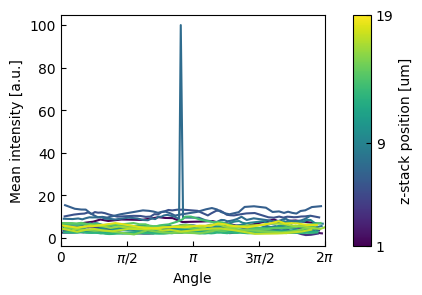

In [110]:
#plot data per stack in an intensity plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(4, 3), 
                               gridspec_kw={'width_ratios': [15, 1]})

weights = np.arange(1, len(int_dataframes)*voxel_size, voxel_size)
norm = cm.colors.Normalize(vmax=weights.max(), vmin=weights.min())
cmap = cm.viridis
color_list=[]


for i in range(len(int_dataframes)):
    color_list.append(cmap(i/(len(int_dataframes))))
    ax1.plot(int_dataframes[i]['angle'], int_dataframes[i]['%Area'], color=color_list[i])
    
ax1.set_ylabel('Mean intensity [a.u.]')
ax1.set_xlabel('Angle')
ax1.set_xlim(0, 2*np.pi)
ax1.set_xticks(np.arange(0, 2*np.pi+0.01, np.pi/2))
labels = ['$0$', r'$\pi/2$',  r'$\pi$',
           r'$3\pi/2$',  r'$2\pi$']
ax1.set_xticklabels(labels)
ax1.tick_params(axis="x", direction="in")
ax1.tick_params(axis="y", direction="in")
ax2.tick_params(axis="y", direction="in")



map = plt.cm.ScalarMappable(cmap=cmap, norm=norm)

# Add colorbar
cbar = plt.colorbar(map, cax=ax2, label='z-stack position [um]', ticks=[weights.min(), weights.max(), int(weights.max()/2)])

new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'
}
mpl.rcParams.update(new_rc_params)

plt.savefig(folder_path + '/int_plot_z_stack.svg')
plt.show()


In [111]:
print(len(coord_csv_files))

20


Run the next window in case you want to plot radius and intensity of a single stack only

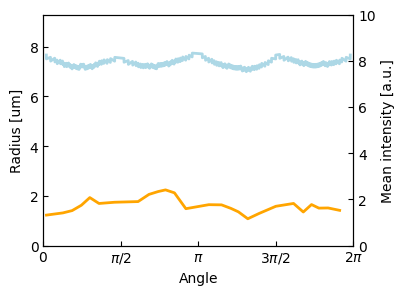

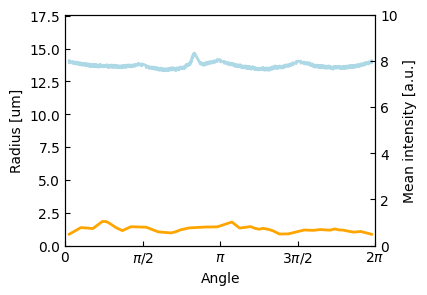

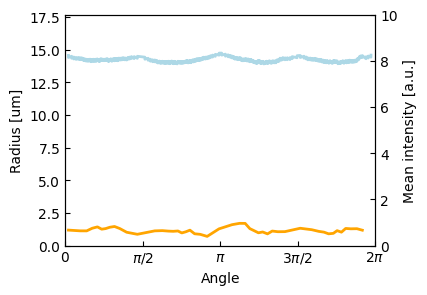

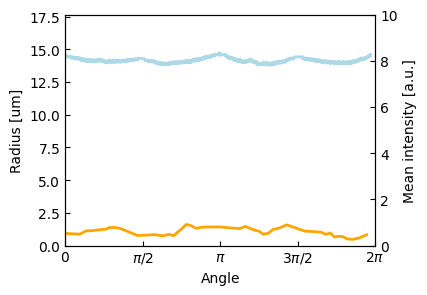

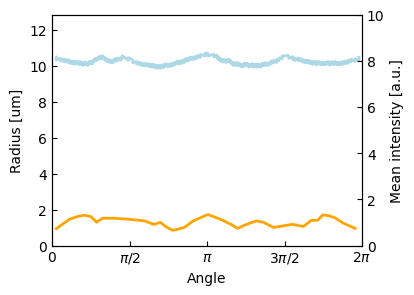

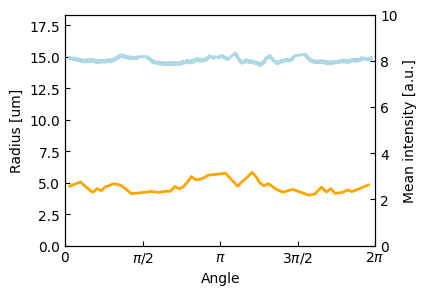

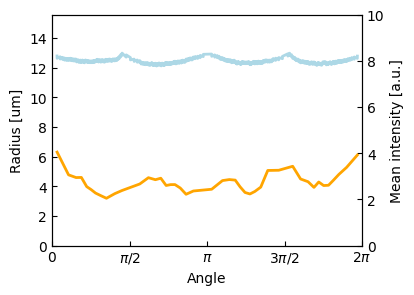

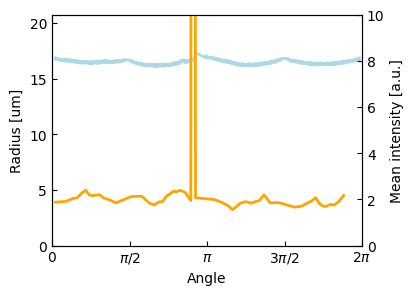

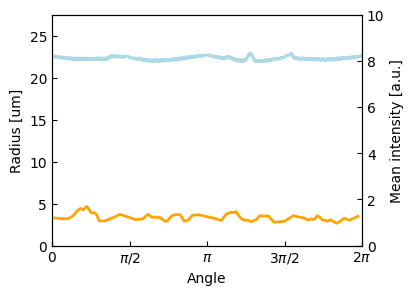

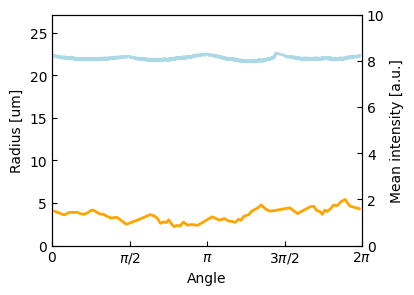

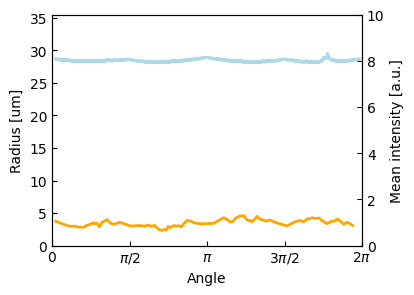

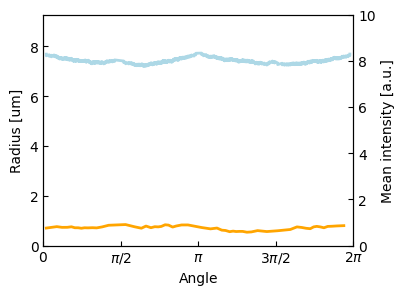

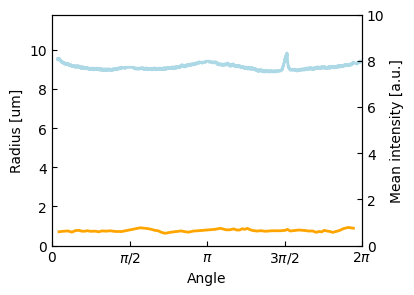

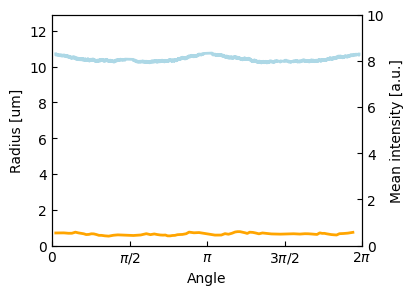

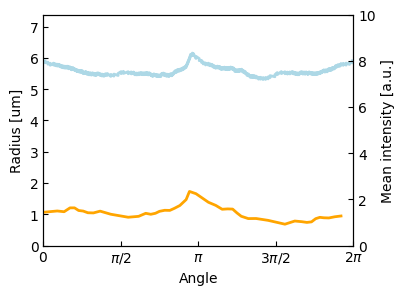

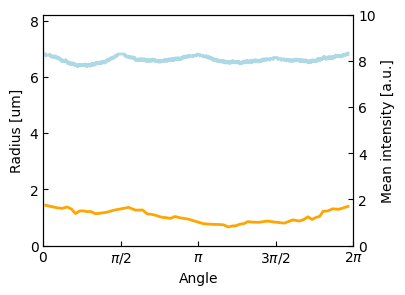

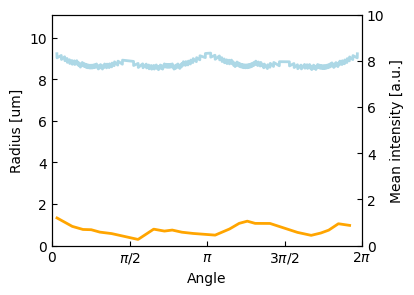

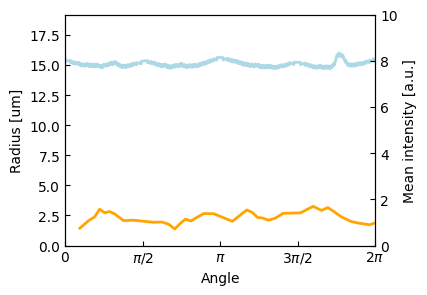

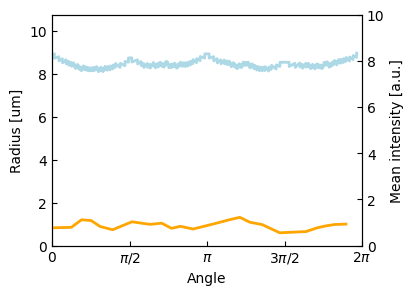

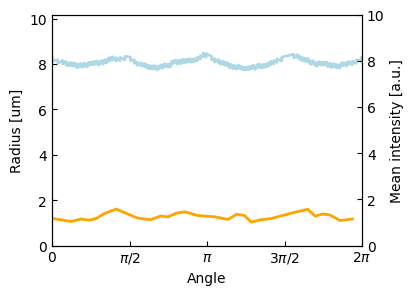

In [113]:
# set variable to stack number that you want to plot
for i in range(len(coord_csv_files)):
    selected_stack = i
    ymax = 15

    f,ax1 = plt.subplots(1, 1, figsize=(4, 3))
    ax2 = ax1.twinx()


    ax1.plot(coord_dataframes[selected_stack]['angle'], coord_dataframes[selected_stack]['distance'], color='lightblue', linewidth=2)


    ax2.plot(int_dataframes[selected_stack]['angle'], int_dataframes[selected_stack]['Mean'], color='orange', linewidth=2)
    ax2.set_ylabel('Mean intensity [a.u.]')


    ax1.set_ylabel('Radius [um]')
    ax1.set_xlabel('Angle')
    ax1.set_xlim(0, 2*np.pi)

    ax1.set_ylim(0, 1.2* max(coord_dataframes[selected_stack]['distance']))
    ax2.set_ylim(0, 10)

    ax1.set_xticks(np.arange(0, 2*np.pi+0.01, np.pi/2))
    labels = ['$0$', r'$\pi/2$',  r'$\pi$',
            r'$3\pi/2$',  r'$2\pi$']
    ax1.set_xticklabels(labels)
    ax1.tick_params(axis="x", direction="in")
    ax1.tick_params(axis="y", direction="in")
    ax2.tick_params(axis="y", direction="in")

    new_rc_params = {'text.usetex': False,
    "svg.fonttype": 'none'
    }
    mpl.rcParams.update(new_rc_params)

    plt.savefig(folder_path + '/radial_plot_slice'+characters_list[selected_stack]+'.svg', dpi= 300)


    plt.show()


In [79]:
dataframes[0]

NameError: name 'dataframes' is not defined